In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import zipfile

In [ ]:
# zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Dataset/mrl_eye/mrl_eye.zip", 'r')
# zip_ref.extractall("/content/drive/MyDrive/Dataset/mrl_eye/")
# zip_ref.close()

In [ ]:
data_dir = '/content/drive/MyDrive/Dataset/mrl_eye'
import pathlib
data_dir = pathlib.Path(data_dir)

In [ ]:
data_dir

PosixPath('/content/drive/MyDrive/Dataset/mrl_eye')

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
image_count

48000

In [ ]:
open = list(data_dir.glob('open_eye/*'))
open[:5]

[PosixPath('/content/drive/MyDrive/Dataset/mrl_eye/open_eye/s0029_00394_0_0_1_0_1_01.png'),
 PosixPath('/content/drive/MyDrive/Dataset/mrl_eye/open_eye/s0029_00395_0_0_1_0_1_01.png'),
 PosixPath('/content/drive/MyDrive/Dataset/mrl_eye/open_eye/s0029_00396_0_0_1_0_1_01.png'),
 PosixPath('/content/drive/MyDrive/Dataset/mrl_eye/open_eye/s0029_00397_0_0_1_0_1_01.png'),
 PosixPath('/content/drive/MyDrive/Dataset/mrl_eye/open_eye/s0029_00398_0_0_1_0_1_01.png')]

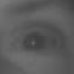

In [ ]:
import PIL
PIL.Image.open(open[5])

In [ ]:
eyes = {
    'open': list(data_dir.glob('open_eye/*'))[:200],
    'closed' : list(data_dir.glob('closed_eye/*'))[:200]
}
len(eyes['closed'])

200

In [ ]:
labels = {
    'open' : 1,
    'closed' : 0
}

In [ ]:
img = cv2.imread(str(eyes['open'][9]))
img.shape

(72, 72, 3)

In [ ]:
X, y = [], []

for eye_state, images in eyes.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_image = cv2.resize(img, (224,224))
    X.append(resized_image)
    y.append(labels[eye_state])

In [ ]:
# import pickle
# pickle_out = open("/content/drive/MyDrive/Dataset/mrl_eye/X.pickle", "wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# pickle_out = open("/content/drive/MyDrive/Dataset/mrl_eye/y.pickle", "wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

In [ ]:
# pickle_in = open("/content/drive/MyDrive/Dataset/mrl_eye/X.pickle", "rb")
# X = pickle.load(X, pickle_in)

# pickle_in = open("/content/drive/MyDrive/Dataset/mrl_eye/y.pickle", "rb")
# y = pickle.load(y, pickle_in)

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
y[:5]

[1, 1, 1, 1, 1]

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
num_classes = 2
model = Sequential([
                    # 16 filters and size is 3x3
                    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(num_classes)
])
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 5, validation_split = 0.1)

Epoch 1/5
9/9 [==============================] - 12s 139ms/step - loss: 0.7394 - accuracy: 0.5444 - val_loss: 0.7017 - val_accuracy: 0.4667
Epoch 2/5
9/9 [==============================] - 0s 53ms/step - loss: 0.6877 - accuracy: 0.5630 - val_loss: 0.6736 - val_accuracy: 0.9000
Epoch 3/5
9/9 [==============================] - 0s 52ms/step - loss: 0.6685 - accuracy: 0.6852 - val_loss: 0.6443 - val_accuracy: 0.7333
Epoch 4/5
9/9 [==============================] - 0s 51ms/step - loss: 0.6150 - accuracy: 0.7815 - val_loss: 0.5772 - val_accuracy: 0.5333
Epoch 5/5
9/9 [==============================] - 0s 51ms/step - loss: 0.4787 - accuracy: 0.8074 - val_loss: 0.3200 - val_accuracy: 0.9333


In [ ]:
model.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 60ms/step - loss: 0.2851 - accuracy: 0.9700


[0.28512895107269287, 0.9700000286102295]

In [ ]:
predictions = model.predict(X_test_scaled)[0:10]
score = tf.nn.softmax(predictions[6])
np.argmax(score)

1

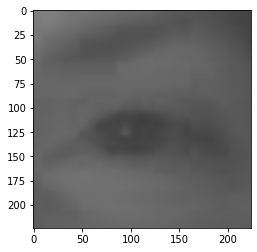

In [ ]:
plt.imshow(X_test[6])

In [ ]:
import tensorflow_hub as hub

In [ ]:
# This gives the same model except the last layer
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrianed_model_without_toplayer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False
)

In [ ]:
eye_state = 2
model = tf.keras.Sequential([
                             pretrianed_model_without_toplayer,
                             tf.keras.layers.Dense(eye_state)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

model.fit(X_train_scaled, y_train, epochs = 10, validation_split = 0.1)

Epoch 1/10
9/9 [==============================] - 7s 282ms/step - loss: 0.3592 - accuracy: 0.8519 - val_loss: 0.1344 - val_accuracy: 1.0000
Epoch 2/10
9/9 [==============================] - 1s 96ms/step - loss: 0.0593 - accuracy: 1.0000 - val_loss: 0.0410 - val_accuracy: 1.0000
Epoch 3/10
9/9 [==============================] - 1s 89ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 1s 97ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 1s 88ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 1s 87ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 1s 90ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 8/10
9/9 [==========

In [ ]:
model.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 1s 209ms/step - loss: 0.0039 - accuracy: 1.0000


[0.0038531802129000425, 1.0]

In [ ]:
yp = model.predict(X_test_scaled)

In [ ]:
y_pred = []
for element in yp:
  if element[0]>element[1]:
    y_pred.append(0)
  else:
    y_pred.append(1)

y_pred[:10]

[1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

In [ ]:
y_test[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

Text(69.0, 0.5, 'Truth')

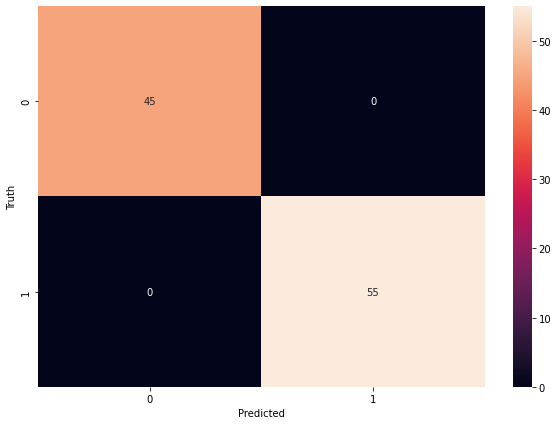

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# model.save('/content/drive/MyDrive/Dataset/mrl_eye/model.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Dataset/mrl_eye/model.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
test_image = cv2.imread('/content/drive/MyDrive/Dataset/mrl_eye/face.jpg')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# from google.colab.patches import cv2_imshow
# cv2_imshow(gray)

In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg \
    -O test.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

--2022-03-17 16:57:57--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240458 (235K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 234.82K  --.-KB/s    in 0.02s   

2022-03-17 16:57:57 (9.33 MB/s) - ‘test.jpg’ saved [240458/240458]

--2022-03-17 16:57:57--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

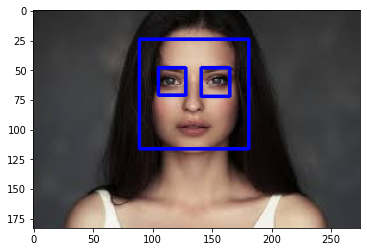

In [ ]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eye = eye_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in eye:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))